In [2]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import numpy as np
from collections import defaultdict
from scipy import stats

cid ="baca9371d5f8409a85ffee343639df22" 
secret = "75d20d82245b445882cafae68e3442aa"

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{A$AP,Rocky}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/13ubrt8QOOCPljQ2FL1Kca'},
  'href': 'https://api.spotify.com/v1/artists/13ubrt8QOOCPljQ2FL1Kca',
  'id': '13ubrt8QOOCPljQ2FL1Kca',
  'name': 'A$AP Rocky',
  'type': 'artist',
  'uri': 'spotify:artist:13ubrt8QOOCPljQ2FL1Kca'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/2p1fiYHYiXz9qi0JJyxBzN'},
  'href': 'https://api.spotify.com/v1/artists/2p1fiYHYiXz9qi0JJyxBzN',
  'id': '2p1fiYHYiXz9qi0JJyxBzN',
  'name': 'Skepta',
  'type': 'artist',
  'uri': 'spotify:artist:2p1fiYHYiXz9qi0JJyxBzN'}]

In [3]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:3MATDdrpHmQCmuOcozZjDa',
 'spotify:album:4McL6uB0omKrLAsZtXQwDA',
 'spotify:album:5b6HBIqolYQCK29Ma4tVqP',
 'spotify:album:3arNdjotCvtiiLFfjKngMc',
 'spotify:album:6MGLjgaBfHSsWl1A06mW4j',
 'spotify:album:6rzMufuu8sLkIizM4q9c7J',
 'spotify:album:5WHY4T7LcWAJPb1ddChotC']

In [4]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [5]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album TESTING songs has been added to spotify_albums dictionary
Album TESTING songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album LONG.LIVE.A$AP (Deluxe Version) songs has been added to spotify_albums dictionary
Album LONG.LIVE.A$AP songs has been added to spotify_albums dictionary


In [6]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [7]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 61.80503988265991 seconds


In [8]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

115

In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
pd.unique(df['album'])

array(['TESTING', 'AT.LONG.LAST.A$AP', 'LONG.LIVE.A$AP (Deluxe Version)',
       'LONG.LIVE.A$AP'], dtype=object)

In [125]:
df_a = df[['album','name','valence','popularity']]
df_b = df[df["album"]!="LONG.LIVE.A$AP"]
subset = list(range(0,15))
subset.extend(list(range(30,50)))
subset.extend(list(range(86,103)))

final_df = df_b.iloc[subset,:]

final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,TESTING,1,57q6BgYP4gN6hPQViCB3um,Distorted Records,spotify:track:57q6BgYP4gN6hPQViCB3um,0.137000,0.655,0.869,0.000024,0.3120,-4.344,0.2120,135.763,0.0815,59
1,TESTING,2,3oHkMCVJyOcjg5FhfLc2Rq,A$AP Forever REMIX,spotify:track:3oHkMCVJyOcjg5FhfLc2Rq,0.299000,0.322,0.754,0.000000,0.1360,-6.416,0.2750,62.839,0.3920,67
2,TESTING,3,52eYVUkFTOVozbVFIaFrnV,Tony Tone,spotify:track:52eYVUkFTOVozbVFIaFrnV,0.139000,0.534,0.783,0.000000,0.0831,-4.013,0.2610,69.716,0.3340,64
3,TESTING,4,1AqemxWsT0iGg5Lvkm16Bt,Fukk Sleep,spotify:track:1AqemxWsT0iGg5Lvkm16Bt,0.443000,0.793,0.412,0.000074,0.2190,-9.305,0.3640,135.937,0.3070,73
4,TESTING,5,7ycWLEP1GsNjVvcjawXz3z,Praise The Lord (Da Shine) (feat. Skepta),spotify:track:7ycWLEP1GsNjVvcjawXz3z,0.060900,0.850,0.569,0.081600,0.1000,-8.152,0.1360,80.020,0.2940,84
5,TESTING,6,1wGYcpJZ59rePkNu4zHmLu,CALLDROPS,spotify:track:1wGYcpJZ59rePkNu4zHmLu,0.896000,0.513,0.404,0.049300,0.1360,-11.101,0.1260,127.992,0.4600,58
6,TESTING,7,6ImrWnhjEOw5re3cGLMIHJ,Buck Shots,spotify:track:6ImrWnhjEOw5re3cGLMIHJ,0.325000,0.433,0.850,0.000000,0.3560,-5.790,0.4160,159.956,0.5800,61
7,TESTING,8,5N521RK66Z1FP0Oz6B4OlT,Gunz N Butter,spotify:track:5N521RK66Z1FP0Oz6B4OlT,0.606000,0.852,0.632,0.000000,0.1420,-8.080,0.4310,140.489,0.7160,63
8,TESTING,9,6MmtDonkpvSoRx9ACwrGDu,Brotha Man,spotify:track:6MmtDonkpvSoRx9ACwrGDu,0.520000,0.573,0.398,0.000000,0.1130,-9.372,0.1140,124.073,0.4360,56
9,TESTING,10,5TX0mfUkpGlU6j2xa00ERx,OG Beeper,spotify:track:5TX0mfUkpGlU6j2xa00ERx,0.121000,0.910,0.477,0.000000,0.3050,-5.259,0.4180,145.994,0.3130,60


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

Text(0, 0.5, 'Valence Score')

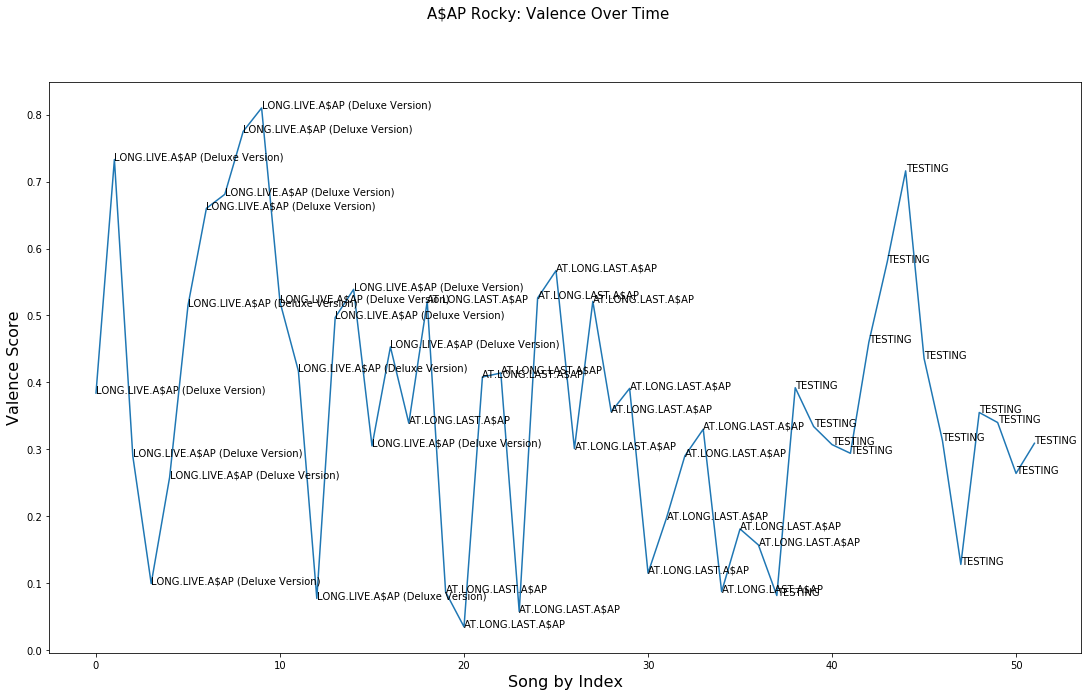

In [124]:
albums = list(pd.unique(final_df["album"]))
albums.reverse()

alb_n = []
v_scores = []

for x in albums:
    for track in final_df[final_df["album"]==x].iterrows():
        
        alb_n.append(track[1]['album'])
        v_scores.append(track[1]['valence'])

fig, ax = pyplot.subplots()
ax.plot(v_scores)

for i in range(len(v_scores)):
    ax.annotate(alb_n[i],(i,v_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('A$AP Rocky: Valence Over Time', fontsize=15)
pyplot.xlabel('Song by Index', fontsize=16)
pyplot.ylabel('Valence Score', fontsize=16)

Text(0, 0.5, 'Valence Scores')

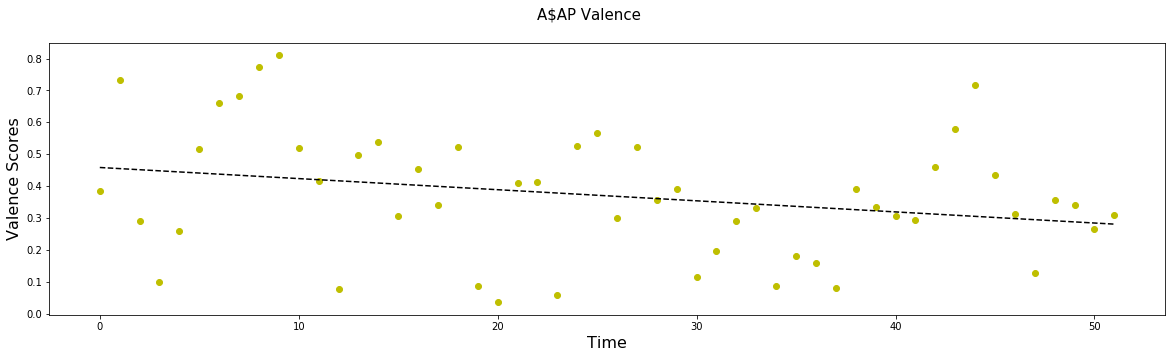

In [122]:
x = range(0,len(v_scores))

pyplot.figure(figsize=(20, 5))

coef = np.polyfit(x,v_scores,deg=1)
poly1d_fn = np.poly1d(coef) 

pyplot.plot(x,v_scores, 'yo', x, poly1d_fn(x), '--k')

fig = pyplot.gcf()

fig.suptitle('A$AP Valence', fontsize=15)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Valence Scores', fontsize=16)

In [123]:
stat_lst = []
stat_lst = [slope, intercept, r_value, p_value, std_err] = stats.linregress(x, v_scores)
r_sq = stat_lst[2]**2
print(r_sq)

stat_lst

0.07214701260238678


LinregressResult(slope=-0.0034847434474515517, intercept=0.45815711175616847, rvalue=-0.26860195941650683, pvalue=0.05418208388165936, stderr=0.0017673241690453906)

In [128]:
final_df[['album','name','valence',]].groupby(df['album'],sort=False).describe().iloc[::-1]

valence                                      \
                                  count      mean       std     min     25%   
album                                                                         
LONG.LIVE.A$AP (Deluxe Version)    17.0  0.471388  0.220099  0.0772  0.3050   
AT.LONG.LAST.A$AP                  20.0  0.294015  0.171258  0.0347  0.1465   
TESTING                            15.0  0.353967  0.156996  0.0815  0.3005   

                                                        
                                    50%     75%    max  
album                                                   
LONG.LIVE.A$AP (Deluxe Version)  0.4970  0.6600  0.810  
AT.LONG.LAST.A$AP                0.3155  0.4095  0.567  
TESTING                          0.3340  0.4140  0.716